Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

Reading and Understanding the data

In [2]:
data = pd.read_csv('./DataSets/avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [7]:
data.shape

(18249, 14)

Checking for Null Values

In [8]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Visualizing the Data

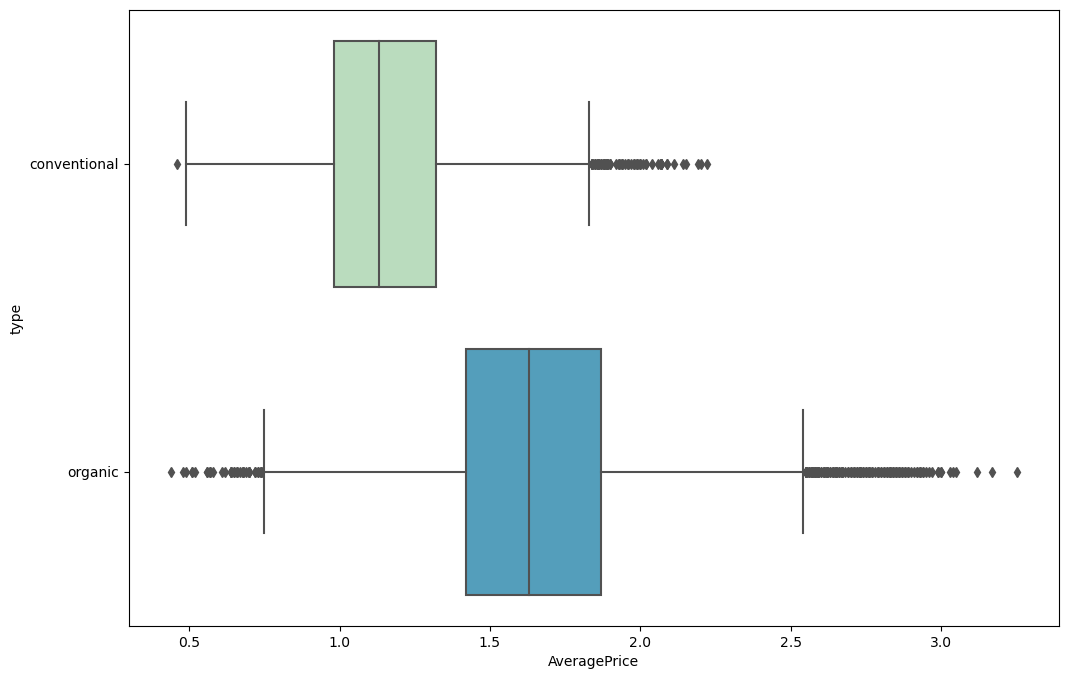

In [9]:
sns.boxplot(y="type", x="AveragePrice", data=data, palette = 'GnBu')
plt.show()

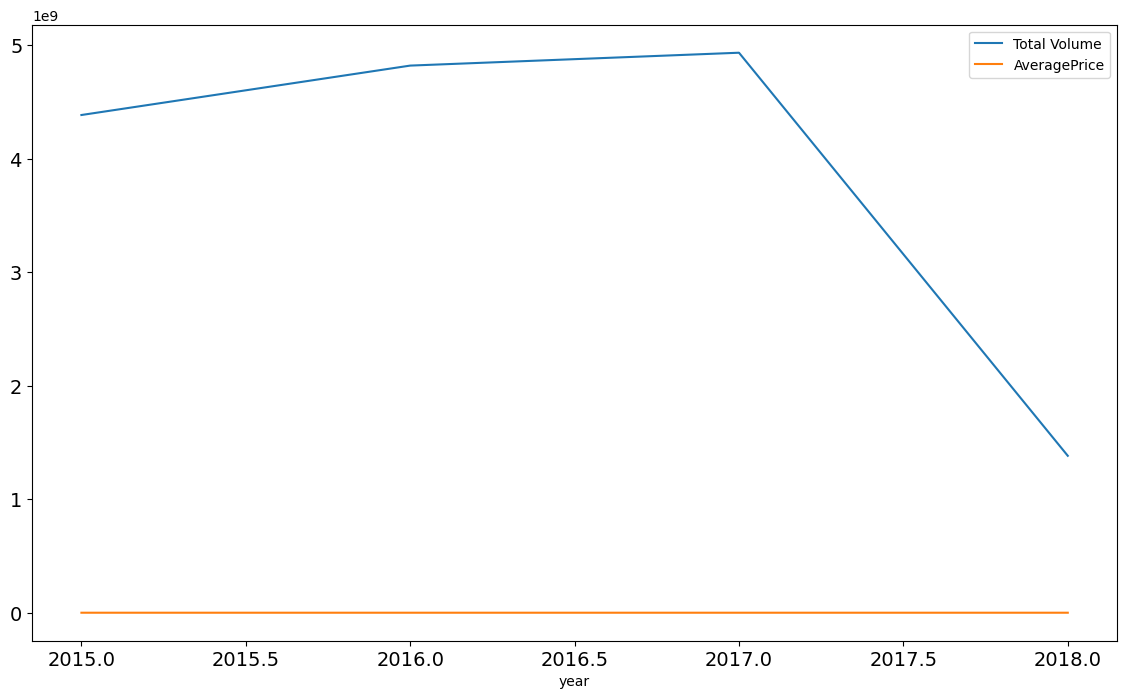

In [10]:
Year = data[['Total Volume' ,'AveragePrice']].groupby(data.year).sum()
Year.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

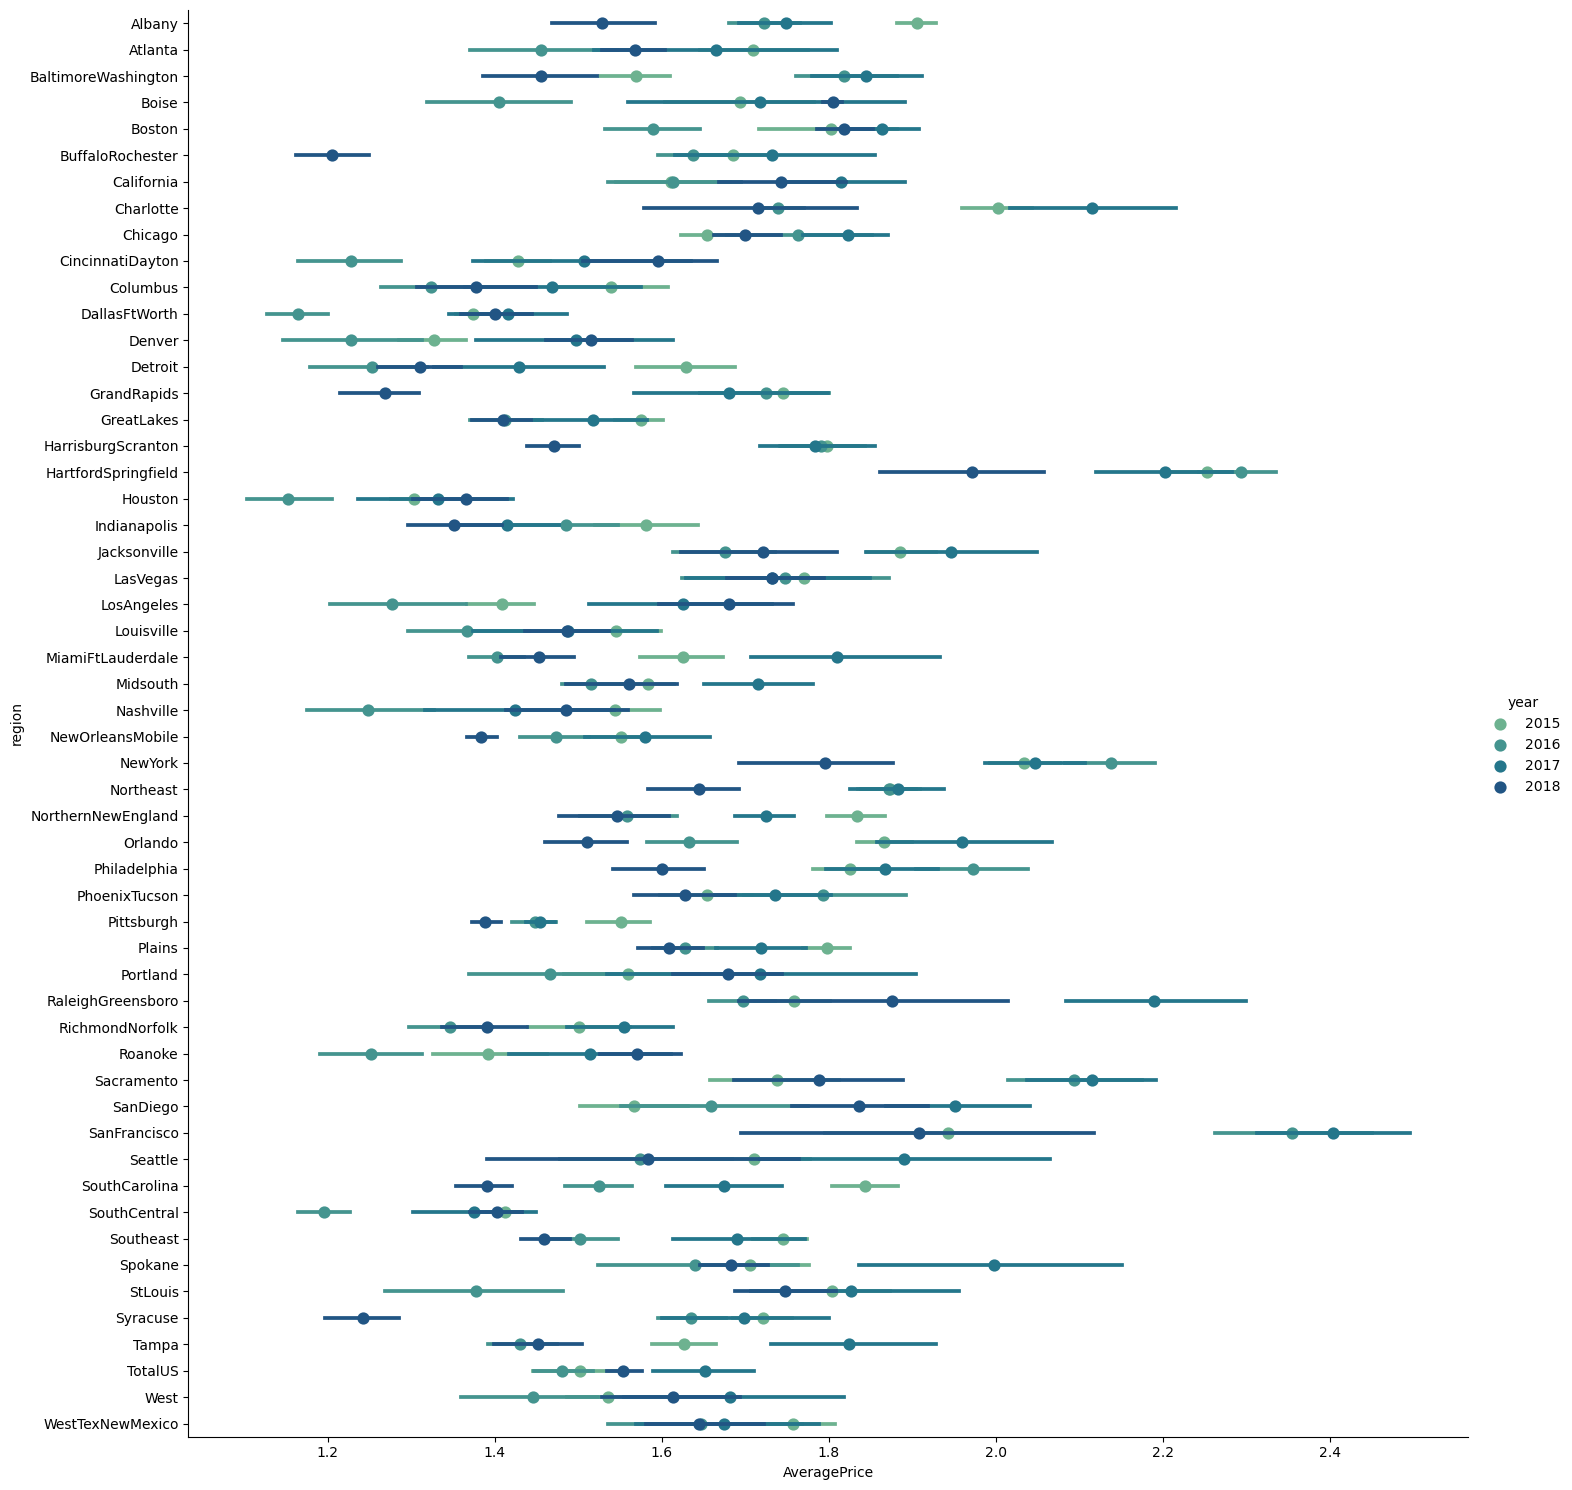

In [11]:
mask = data['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=data[mask],
                   hue='year',
                   size = 15,
                   palette='crest',
                   join=False,
              )
plt.show()

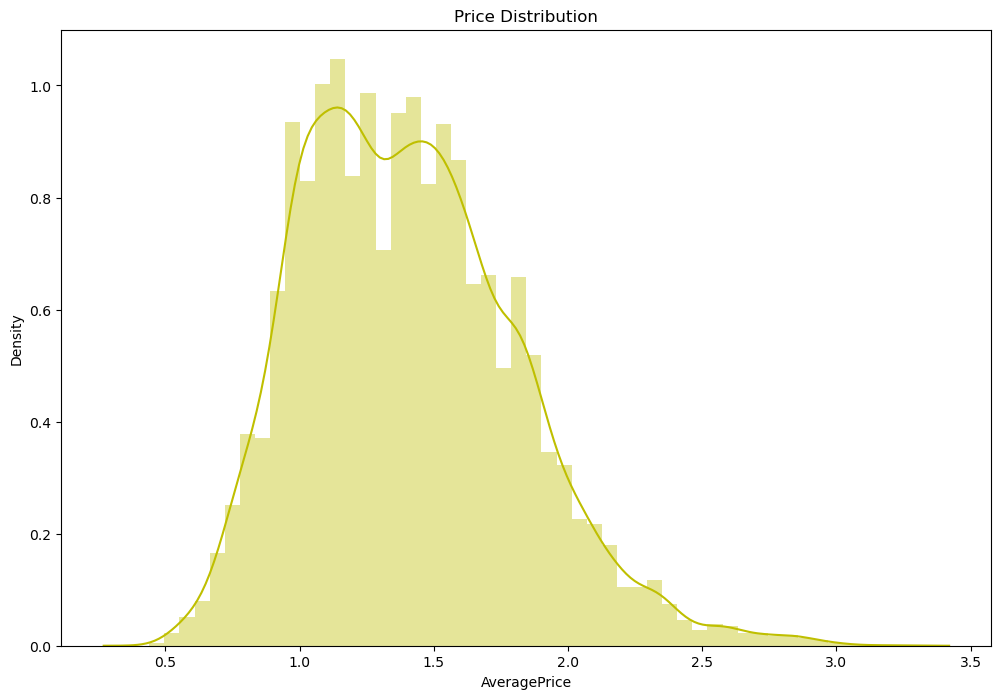

In [12]:
plt.title("Price Distribution")
ax = sns.distplot(data["AveragePrice"], color = 'y')
plt.show()

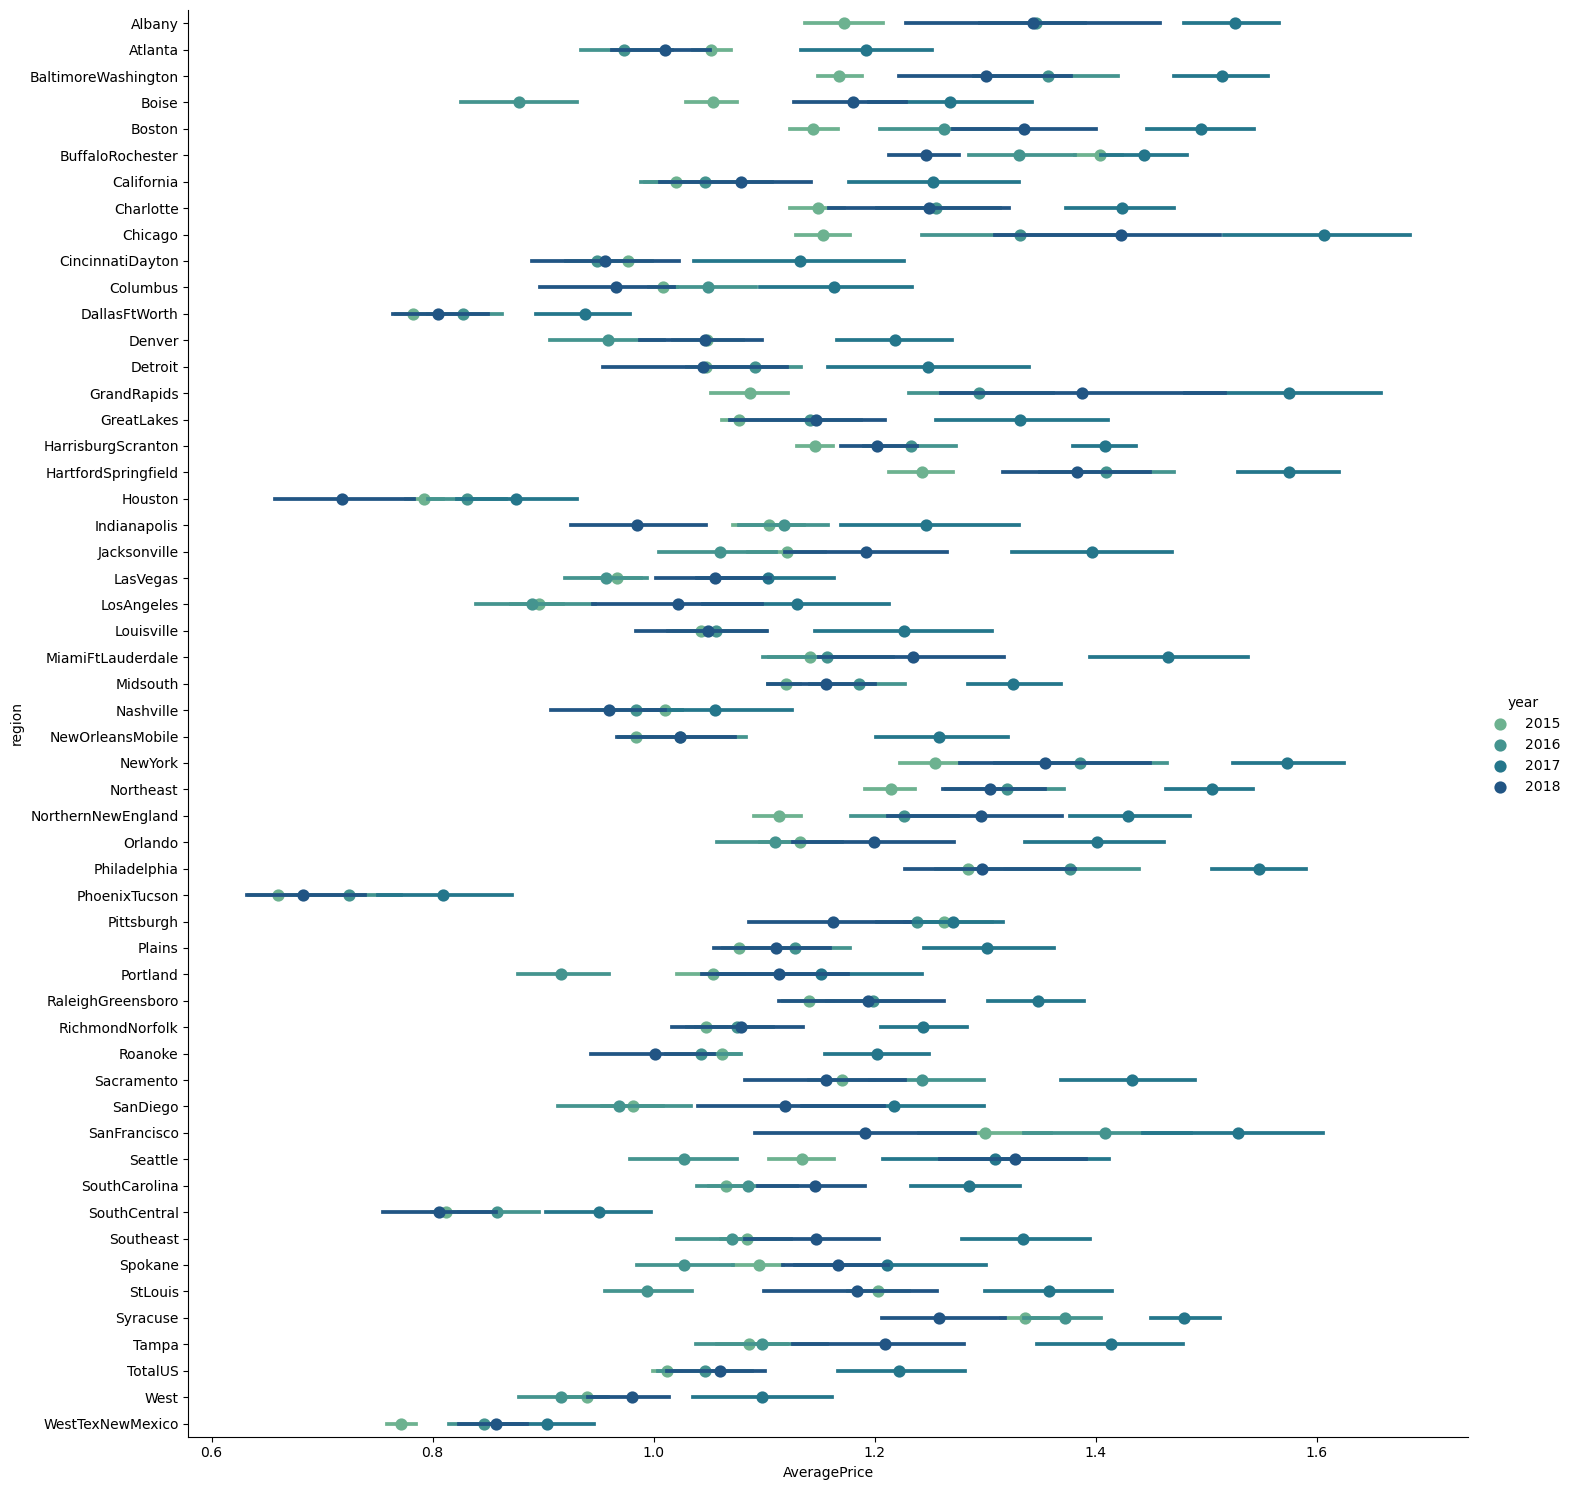

In [13]:
mask = data['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=data[mask],
                   hue='year',
                   size = 15,
                   palette='crest',
                   join=False,
              )
plt.show()

Applying Regression Models on the dataset


In [16]:
y = data.AveragePrice	
data.drop(['AveragePrice','Date'], axis=1, inplace=True)

In [17]:
x_train,x_test,y_train,y_test =  train_test_split(data, y, train_size=0.7,test_size=0.3, random_state=0)

In [18]:
s = (x_train.dtypes == 'object')
object_cols = list(s[s].index)

n = (x_train.dtypes == ('float64','int64'))
numerical_cols = list(n[n].index)

Using One Hot Encoder

In [19]:
#using One Hot Encoder to make the categorical columns usable

oneHot = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
oneHottrain = pd.DataFrame(oneHot.fit_transform(x_train[object_cols]))
oneHottest = pd.DataFrame(oneHot.transform(x_test[object_cols]))

#reattaching index since OneHotEncoder removes them:
oneHottrain.index = x_train.index
oneHottest.index = x_test.index 

#dropping the old categorical columns:
cattraincol = x_train.drop(object_cols, axis=1)
cattestcol = x_test.drop(object_cols, axis=1)

#concatenating the new columns:
x_train = pd.concat([cattraincol, oneHottrain], axis=1)
x_test = pd.concat([cattestcol, oneHottest], axis=1)

In [20]:
data.head()

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [21]:
trainf = x_train.values
testf = x_test.values

minmax = MinMaxScaler()

x_train = minmax.fit_transform(trainf)
x_test = minmax.transform(testf)

#defining a way to find Mean Absolute Percentage Error:
def PercentError(preds, ytest):
  error = abs(preds - ytest)

  errorp = np.mean(100 - 100*(error/ytest))

  print('the accuracy is:', errorp)

Random Forest Regressor Model

In [24]:
#implementing the algo:
RF = RandomForestRegressor(n_estimators=100, random_state=0, verbose=1)

#fitting the data to random forest regressor:
RF.fit(x_train, y_train)

#predicting the test dataset:
RF_preds = RF.predict(x_test)
PercentError(RF_preds, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


the accuracy is: 93.48014095150278


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Linear Regression

In [25]:
LinearModel = LinearRegression()
LinearModel.fit(x_train, y_train)

LinearPredictions = LinearModel.predict(x_test)
PercentError(LinearPredictions, y_test)

the accuracy is: 85.0534240294403


Ridge Regression

In [26]:
RidgeModel = Ridge(alpha=1.0)
RidgeModel.fit(x_train, y_train)

#predicting on the test dataset:
RidgePredictions = RidgeModel.predict(x_test)
PercentError(RidgePredictions, y_test)

the accuracy is: 85.07289291027722


### ACCURACY SCORES FOR THE MODELS IMPLEMENTED ARE :
RANDOM FOREST REGRESSOR : 93 %
<br>
LINEAR REGRESSION : 85 %
<br>
RIDGE REGRESSION : 85 %